# Echocardiogram 

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.4.0 of ehrapy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.names

File 'echocardiogram.data' already there; not retrieving.

File 'echocardiogram.names' already there; not retrieving.



# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [4]:
names = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening',
         'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'name', 'group', 'alive-at-1']

In [5]:
data = pd.read_csv("echocardiogram.data", sep=",", names=names, on_bad_lines='warn')

b'Skipping line 50: expected 13 fields, saw 14\n'


In [6]:
data["patient_id"] = range(1, len(data) + 1)


Drop data which can be ignored

In [7]:
data = data.drop(["group", "mult", "name"], axis=1)


Replace "?"(missing value) with NaN and convert from object type to numeric type

In [8]:
for att in data.columns:
    data[att].replace('?', np.NaN, inplace=True)
    data[att] = pd.to_numeric(data[att])


In [9]:
data.set_index("patient_id", inplace=True)


In [10]:
data.to_csv("echocardiogram_prepared.csv")


## ehrapy sanity check

In [11]:
adata = ep.io.read_csv("echocardiogram_prepared.csv",
                   index_column="patient_id")


2023-01-18 19:25:19,031 - root INFO - Added all columns to `obs`.
2023-01-18 19:25:19,039 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `131` x `10`.


In [12]:
adata.var_names


Index(['survival', 'still-alive', 'age-at-heart-attack',
       'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd',
       'wall-motion-score', 'wall-motion-index', 'alive-at-1'],
      dtype='object')

In [13]:
ep.ad.type_overview(adata)


Variable names for AnnData object with 131 obs and 10 vars
╚══ 🔓 Unencoded variables
    ╠══ survival -> data type: floating
    ╠══ still-alive -> data type: floating
    ╠══ age-at-heart-attack -> data type: floating
    ╠══ pericardial-effusion -> data type: floating
    ╠══ fractional-shortening -> data type: floating
    ╠══ epss -> data type: floating
    ╠══ lvdd -> data type: floating
    ╠══ wall-motion-score -> data type: floating
    ╠══ wall-motion-index -> data type: floating
    ╚══ alive-at-1 -> data type: floating

Quality control metrics missing. Calculating...

2023-01-18 19:25:19,124 - root INFO - Added the calculated metrics to AnnData's `obs` and `var`.


Feature alive-at-1 had more than 43.51% missing values!

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for faster imputations.

2023-01-18 19:25:19,143 - root INFO - Column names for numeric variables ['lvdd', 'wall-motion-index', 'alive-at-1', 'still-alive', 'age-at-heart-attack', 'survival', 'fractional-shortening', 'pericardial-effusion', 'epss', 'wall-motion-score'] were replaced.


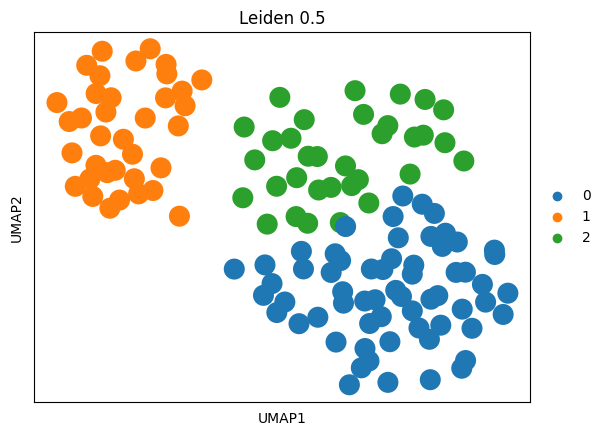

In [14]:
ep.pp.knn_impute(adata)
ep.pp.scale_norm(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")


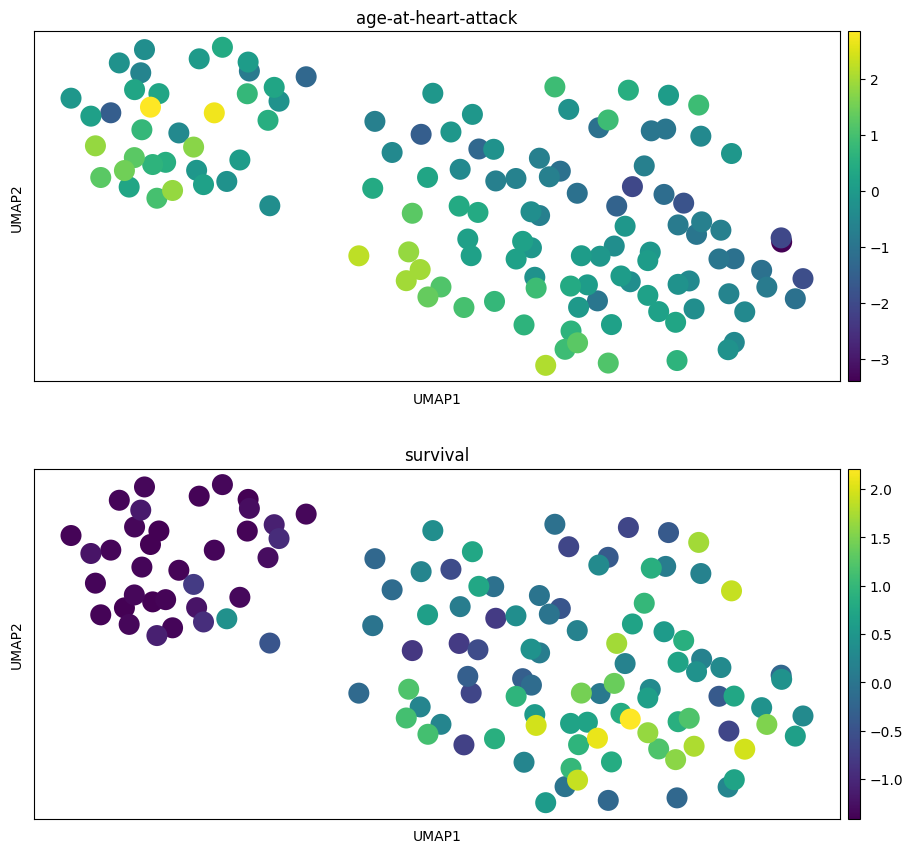

In [15]:
ep.pl.umap(adata, color=["age-at-heart-attack",
           "survival"], ncols=1, wspace=0.75)
